## Import Modules

In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [32]:
import os

dossier = r"C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data"

paths = []
labels = []

# Vérifier tous les dossiers parcourus
for dirname, subdirs, filenames in os.walk(dossier):
    print(f"Exploring folder: {dirname}")  # Debug pour voir les dossiers explorés
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)
        
        # Extraction du label basé sur le nom du dossier parent
        label = os.path.basename(dirname).split('_')[-1].lower()
        labels.append(label)

    if len(paths) == 2800:
        break

print('Dataset is Loaded')
print(f'Nombre de fichiers chargés : {len(paths)}')
print(f'Exemples de labels uniques : {set(labels)}')  # Vérifier la diversité des labels


Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_angry
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_disgust
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_Fear
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_happy
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_neutral
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_Pleasant_surprise
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\OAF_Sad
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emotional speech set data\YAF_angry
Exploring folder: C:\Users\Fddkk\PycharmProjects\Face\TESS Toronto emo

In [33]:
len(paths)

2800

In [34]:
paths[:5]

['C:\\Users\\Fddkk\\PycharmProjects\\Face\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Face\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Face\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Face\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Face\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [35]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [36]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\Fddkk\PycharmProjects\Face\TESS Toron...,angry
1,C:\Users\Fddkk\PycharmProjects\Face\TESS Toron...,angry
2,C:\Users\Fddkk\PycharmProjects\Face\TESS Toron...,angry
3,C:\Users\Fddkk\PycharmProjects\Face\TESS Toron...,angry
4,C:\Users\Fddkk\PycharmProjects\Face\TESS Toron...,angry


In [37]:
df['label'].value_counts()

label
angry        400
disgust      400
fear         400
happy        400
neutral      400
sad          400
surprise     200
surprised    200
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

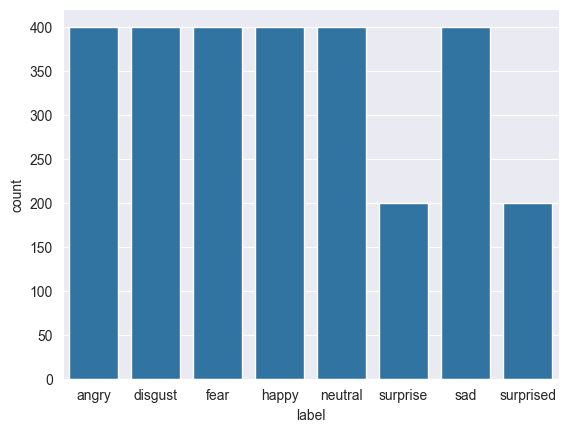

In [38]:
sns.countplot(data=df, x='label')

In [39]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

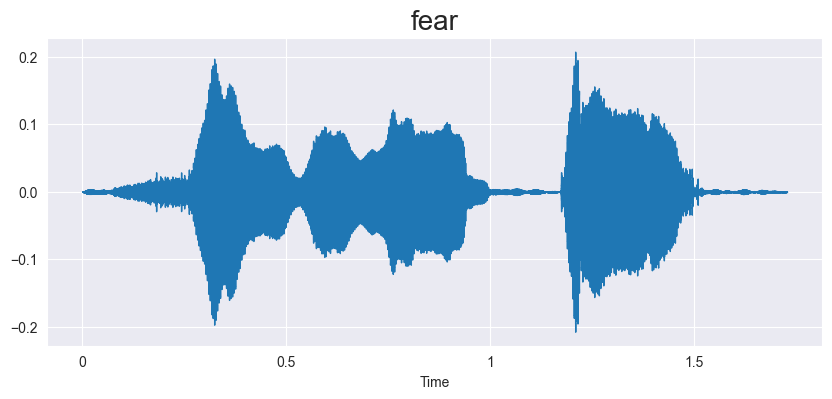

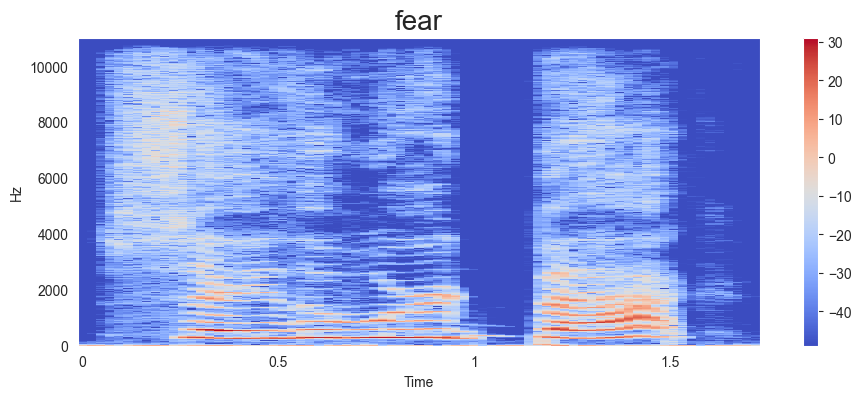

In [40]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

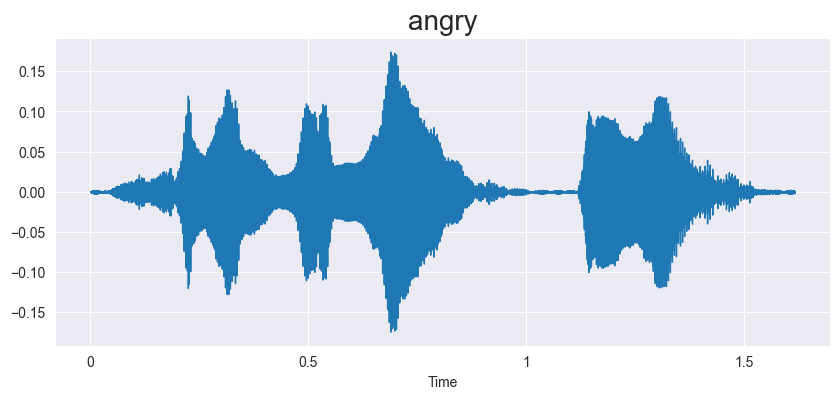

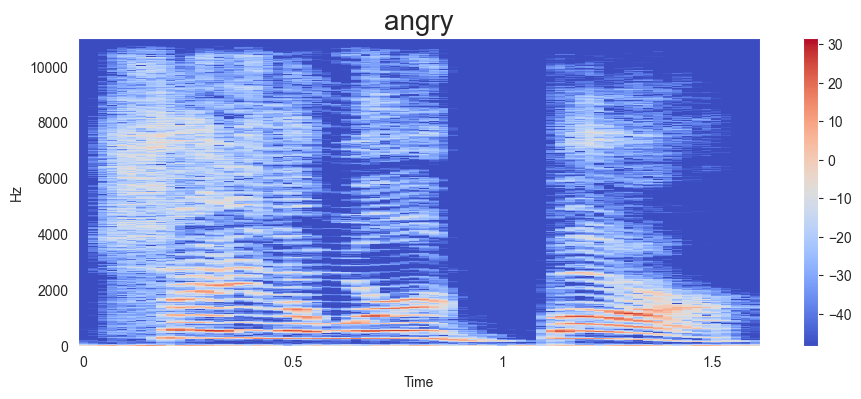

In [41]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

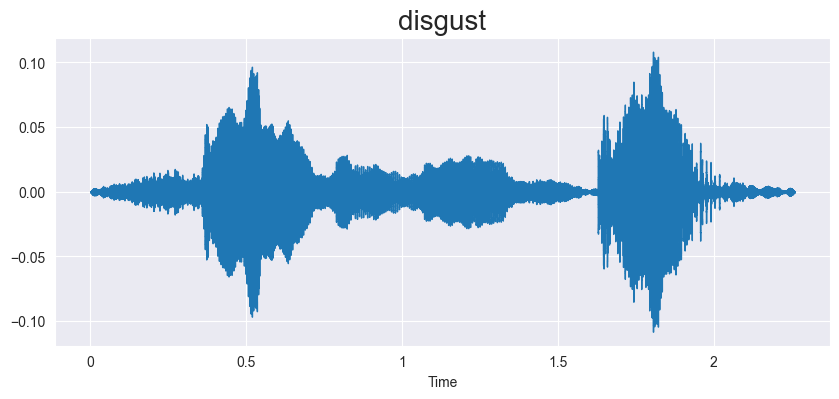

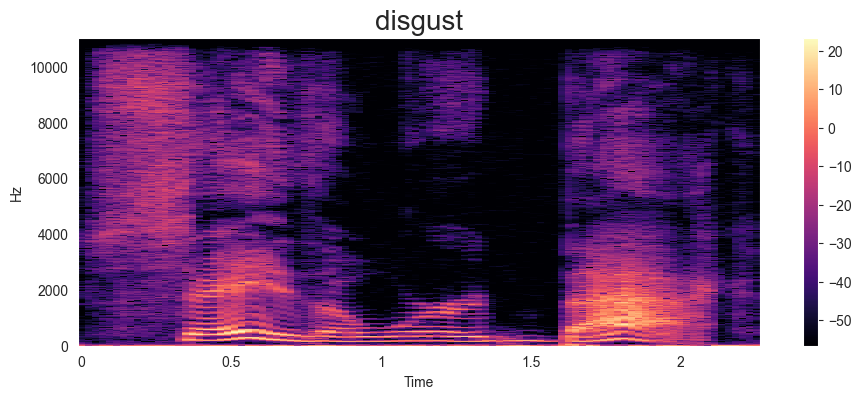

In [42]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

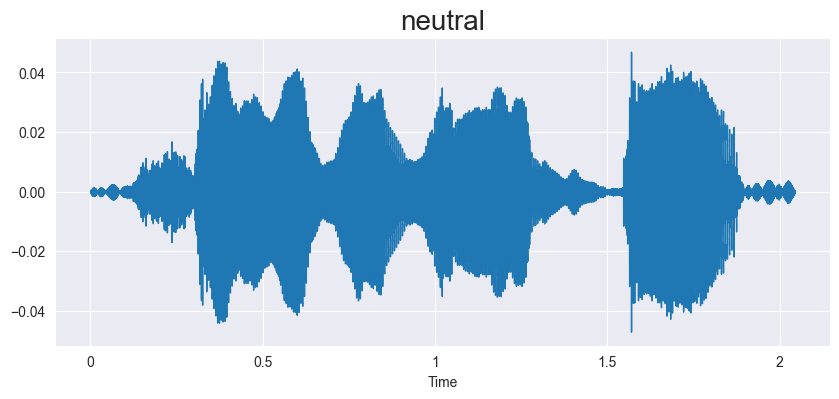

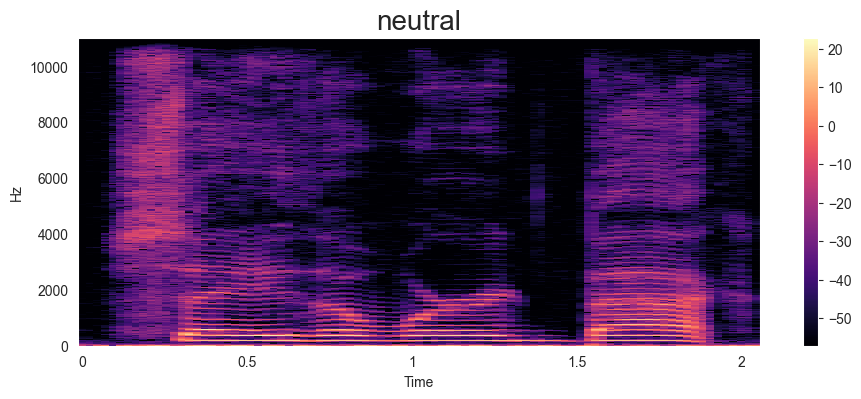

In [43]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

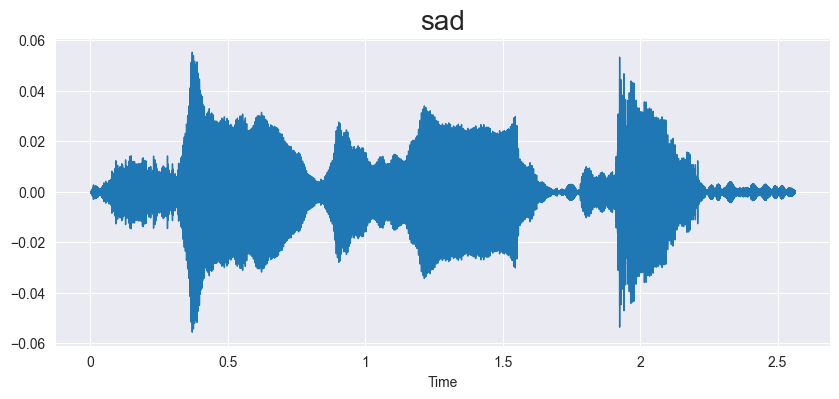

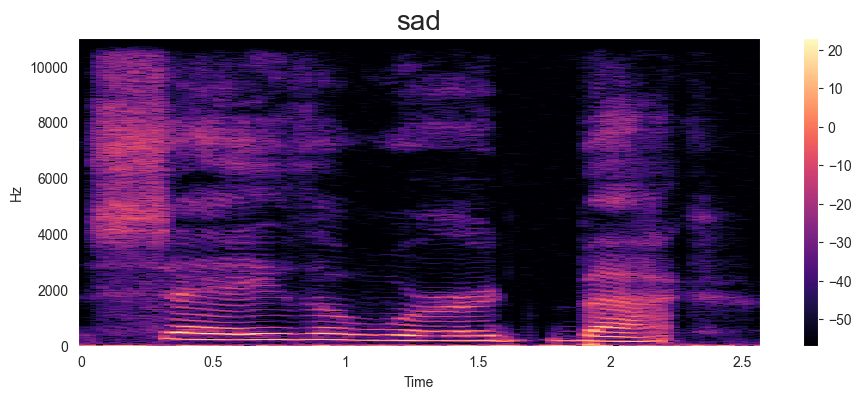

In [44]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [45]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [52]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [53]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736625e-01, -1.8325533e+00,  2.0210145e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548683e+00,  2.5099638e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139238e+00,  2.0891502e+00, -1.9064914e+00],
      dtype=float32)

In [54]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [55]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092945, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.577065, -...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [56]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [57]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [59]:
y = y.toarray()

In [60]:
y.shape

(2800, 8)

## Create the LSTM Model

In [67]:
import tensorflow as tf

# Définition du modèle séquentiel
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=False, input_shape=(40, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)  # Passage de 7 à 8 classes
])

# Recompiler le modèle
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])



In [68]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4546 - loss: 1.5141 - val_accuracy: 0.3554 - val_loss: 3.3660
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7793 - loss: 0.5863 - val_accuracy: 0.3714 - val_loss: 3.4993
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8777 - loss: 0.3551 - val_accuracy: 0.3982 - val_loss: 3.3788
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9294 - loss: 0.2330 - val_accuracy: 0.4232 - val_loss: 3.9448
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9471 - loss: 0.1790 - val_accuracy: 0.5286 - val_loss: 3.9210
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9628 - loss: 0.1380 - val_accuracy: 0.4018 - val_loss: 4.3540
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9600 - loss: 0.1246 - val_accuracy: 0.5321 - val_loss: 3.8449
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9550 - loss: 0.1216 - val_accuracy: 0.3911 - v

In [69]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

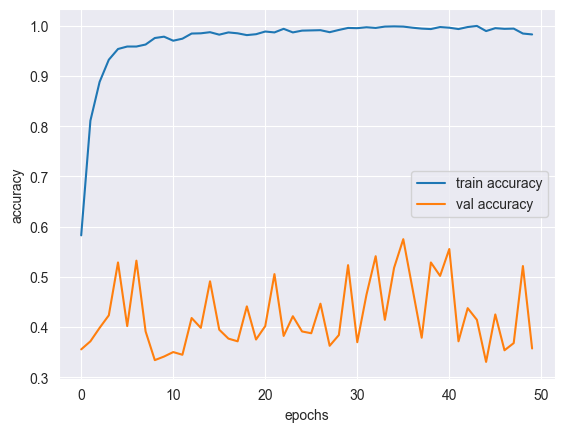

In [70]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

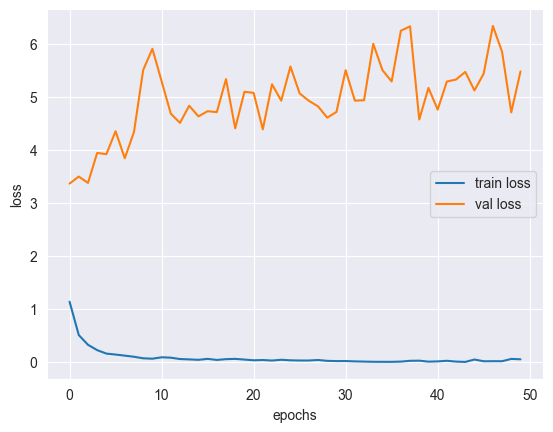

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

(2800, 8)
